In [12]:
from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer= keras.optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [24]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5753 - acc: 0.7164 - val_loss: 0.3770 - val_acc: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3102 - acc: 0.9059 - val_loss: 0.3100 - val_acc: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2209 - acc: 0.9325 - val_loss: 0.2774 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1699 - acc: 0.9474 - val_loss: 0.2857 - val_acc: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1384 - acc: 0.9543 - val_loss: 0.2833 - val_acc: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1110 - acc: 0.9663 - val_loss: 0.3015 - val_acc: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0900 - acc: 0.9750 - val_loss: 0.3298 - val_acc: 0.8817
Epoch 8/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0784 - a

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

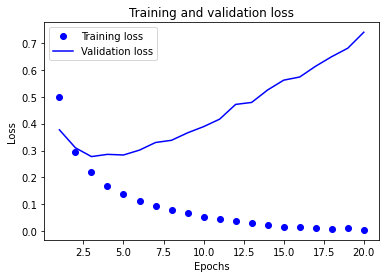

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

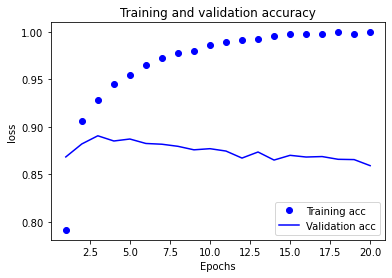

In [39]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()